In [41]:
# 实战美国911数据
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# 1. 读取数据
df = pd.read_csv("./911.csv")

# 2. 把时间字符串转为时间类型
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 3. 添加表示分类的列
# 从 "EMS: BACK PAIN/INJURY" 中提取出 "EMS"
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]

# 4. 将分类列表添加回 DataFrame
# 【修复】直接赋值列表可以避免因索引不匹配导致整列为空(NaN)的问题。
# 这是导致循环不执行、出现 "0 Axes" 错误的主要原因。
df["cate"] = cate_list

# 5. 将 timeStamp 设置为索引，用于按时间重采样(resample)
df.set_index("timeStamp", inplace=True)

# (可选) 检查数据是否正确
print("数据处理后 df 的前5行:")
print(df.head(5))
print("\n'cate' 列的统计信息:")
print(df['cate'].value_counts())



数据处理后 df 的前5行:
                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:56:52  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

                         zip                    title                twp  \
timeStamp                                                                 

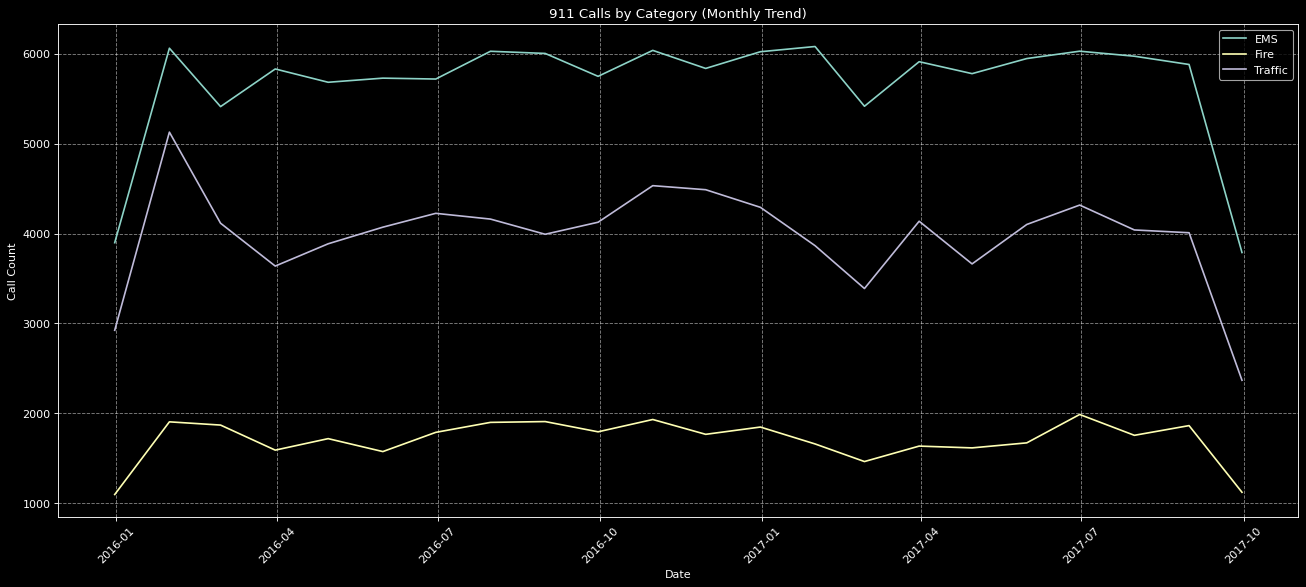

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# --- 1. 数据读取与清洗 (合并到一起确保状态正确) ---
df = pd.read_csv("./911.csv")

# 转换时间类型
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 提取分类 (使用列表赋值，这是正确的方法，避免了 NaN 问题)
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]
df["cate"] = cate_list

# 设置索引
df.set_index("timeStamp", inplace=True)

# 【关键新增】对时间索引进行排序
# resample 对无序时间索引处理可能会报错或产生意外行为，建议加上
df.sort_index(inplace=True)

# --- 2. 绘图部分 ---
plt.figure(figsize=(20, 8), dpi=80)

# 分组并循环绘图
# 只要上面的 df 处理正确，这里一定会有数据进入循环
for group_name, group_data in df.groupby(by="cate"):

    # 按月重采样
    count_by_month = group_data.resample("ME").count()["title"] # Pandas新版本推荐用 'ME' 代表 Month End，老版本用 'M'

    _x = count_by_month.index
    _y = count_by_month.values

    # 绘图
    plt.plot(_x, _y, label=group_name)

# --- 3. 设置标签与显示 ---
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.title("911 Calls by Category (Monthly Trend)")
plt.xlabel("Date")
plt.ylabel("Call Count")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [43]:
# 检查是否存在 NaN 值
print(df["cate"].isnull().sum())
# 如果输出是 0，说明数据填充完美。
# 如果输出等于行数，说明之前提到的“对齐问题”再次出现。

# 检查分组能否产生数据
for name, data in df.groupby("cate"):
    print(f"分类: {name}, 数据量: {len(data)}")
    break # 打印第一个就够了

0
分类: EMS, 数据量: 124840


In [44]:
import pandas as pd
import numpy as np

# 创建第一个 DataFrame 对象
df_obj1 = pd.DataFrame({
    'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
    'data1': np.random.randint(0, 10, 7)
})

# 创建第二个 DataFrame 对象
df_obj2 = pd.DataFrame({
    'key': ['a', 'b', 'd'],
    'data2': np.random.randint(0, 10, 3)
})

# 打印输出
print(df_obj1)
print('-' * 50)
print(df_obj2)

  key  data1
0   b      0
1   b      8
2   a      7
3   c      3
4   a      9
5   a      7
6   b      7
--------------------------------------------------
  key  data2
0   a      4
1   b      1
2   d      3


In [45]:
pd.merge(df_obj1, df_obj2, on='key')
#内连接

,key,data1,data2
0,b,0,1
1,b,8,1
2,a,7,4
3,a,9,4
4,a,7,4
5,b,7,1


In [46]:
pd.merge(df_obj1, df_obj2, how='outer')
#外连接

,key,data1,data2
0,a,7.0,4.0
1,a,9.0,4.0
2,a,7.0,4.0
3,b,0.0,1.0
4,b,8.0,1.0
5,b,7.0,1.0
6,c,3.0,NaN
7,d,NaN,3.0


In [47]:
df_obj1=df_obj1.rename(columns={'key':'key1'})
df_obj2=df_obj2.rename(columns={'key':'key2'})
pd.merge(df_obj1,df_obj2,left_on='key1',right_on='key2')

,key1,data1,key2,data2
0,b,0,b,1
1,b,8,b,1
2,a,7,a,4
3,a,9,a,4
4,a,7,a,4
5,b,7,b,1


In [48]:
import pandas as pd
import numpy as np

# 使用列表乘法和随机数创建 DataFrame
df_obj = pd.DataFrame({
    'data1' : ['a'] * 4 + ['b'] * 4,
    'data2' : np.random.randint(0, 4, 8)
})

# 打印输出结果
print(df_obj)

  data1  data2
0     a      0
1     a      3
2     a      0
3     a      2
4     b      1
5     b      1
6     b      2
7     b      0


In [49]:
print(df_obj.duplicated())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
dtype: bool


In [58]:
df_obj[~df_obj.duplicated()]
print(df_obj.drop_duplicates())#删除重复行

  data1  data2
0     a      0
1     a      3
2     a      1
4     b      0
6     b      2
7     b      1


In [55]:
import pandas as pd
import numpy as np

# 使用列表乘法和随机数创建 DataFrame
df_obj = pd.DataFrame({
    'data1' : ['a'] * 4 + ['b'] * 4,
    'data2' : np.random.randint(0, 4, 8)
})

print(df_obj)

  data1  data2
0     a      0
1     a      3
2     a      1
3     a      3
4     b      0
5     b      0
6     b      2
7     b      1


In [56]:
df_obj1.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
dtype: bool

In [59]:
import pandas as pd
import numpy as np

# 1. 准备数据 (模拟一些包含占位符 -999 和空值的数据)
data = {
    '姓名': ['张三', '李四', '王五', '赵六'],
    '年龄': [25, -999, 30, -999],       # -999 代表缺失数据
    '城市': ['Beijing', 'SH', 'Beijing', 'GZ']
}
df = pd.DataFrame(data)

print("--- 原始数据 ---")
print(df)

# 2. 单值替换：将 -999 替换为 NaN (标准空值)
# 这里的 value可以是一个具体的值，也可以是 np.nan
df_cleaned = df.replace(-999, np.nan)

# 3. 字典替换：一次性替换多个列的不同值
# 比如：把 'SH' 换成 '上海'，把 'GZ' 换成 '广州'
map_dict = {
    'SH': '上海',
    'GZ': '广州',
    'Beijing': '北京'
}
df_final = df_cleaned.replace(map_dict)

print("\n--- 替换后的数据 ---")
print(df_final)

--- 原始数据 ---
   姓名   年龄       城市
0  张三   25  Beijing
1  李四 -999       SH
2  王五   30  Beijing
3  赵六 -999       GZ

--- 替换后的数据 ---
   姓名    年龄  城市
0  张三  25.0  北京
1  李四   NaN  上海
2  王五  30.0  北京
3  赵六   NaN  广州
